# Linear Regression Example

A linear regression learning algorithm example using TensorFlow library.


In [65]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
import time
rng = numpy.random

In [21]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [22]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]


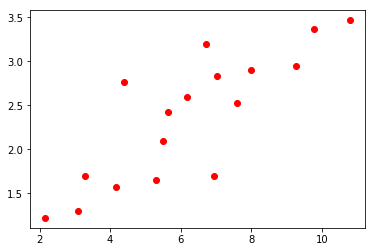

In [23]:
#show data
plt.plot(train_X, train_Y, 'ro', label='Original data')

## Learn a linear regression to fit the dataset
y_pred = w*x+b

We learn w and b from the dataset

## Two phase to write your tf program
### Build a model (assemble a graph)
1. Define placeholders for input and output (label)
2. Define the weight
3. Define the inference model
4. Define loss function
5. Define optimizer

### Training (Use a session to execute operations in the graph)
1. Initialize model parameters
2. Input training data
3. Execute inference model on training data
4. Compute loss
5. Adust mode parameters to minimize the loss
6. Repeat 2->5 util loss convergence



### linear regression v1

In [93]:
tf.reset_default_graph()
# define the input by placeholder
with tf.name_scope('inputs'):
    x = tf.placeholder(tf.float32,name='x')
    y = tf.placeholder(tf.float32,name='y')
# define the weight
# represent the learnable paramters by tf.placeholder
with tf.variable_scope('params'):
    w = tf.placeholder(tf.float32,name='w')
    b = tf.placeholder(tf.float32,name='b')
# construct inference model
with tf.name_scope('inference'):
    y_pred = tf.multiply(w,x) + b
# Mean squared error as loss function
with tf.name_scope('loss'):
    cost = tf.reduce_sum(tf.pow(y_pred-y, 2))/(2*n_samples)
with tf.name_scope('grads'):
    grad_w,grad_b = tf.gradients(cost,[w,b])
tf.summary.FileWriter('linear_model_v1',tf.get_default_graph())

Epoch: 0050 cost= 0.014461425 W= 0.145537480712 b= 1.55003869534
Epoch: 0100 cost= 0.013435257 W= 0.151726171374 b= 1.50551772118
Epoch: 0150 cost= 0.012504579 W= 0.157546773553 b= 1.46364462376
Epoch: 0200 cost= 0.011659737 W= 0.163021221757 b= 1.4242619276
Epoch: 0250 cost= 0.010892101 W= 0.168170064688 b= 1.38722145557
Epoch: 0300 cost= 0.010193979 W= 0.173012688756 b= 1.35238397121
Epoch: 0350 cost= 0.009558465 W= 0.17756728828 b= 1.31961846352
Epoch: 0400 cost= 0.008979419 W= 0.181851029396 b= 1.28880167007
Epoch: 0450 cost= 0.008451318 W= 0.185879975557 b= 1.25981760025
Epoch: 0500 cost= 0.007969234 W= 0.189669311047 b= 1.23255753517
Epoch: 0550 cost= 0.007528737 W= 0.193233266473 b= 1.20691859722
Epoch: 0600 cost= 0.007125868 W= 0.196585267782 b= 1.1828045845
Epoch: 0650 cost= 0.006757063 W= 0.199737906456 b= 1.16012465954
Epoch: 0700 cost= 0.006419138 W= 0.202703043818 b= 1.13879370689
Epoch: 0750 cost= 0.006109224 W= 0.205491825938 b= 1.11873137951
Epoch: 0800 cost= 0.00582473

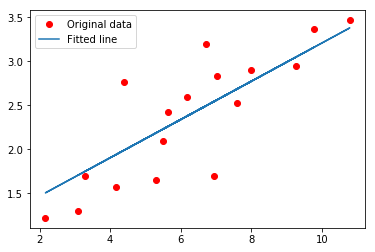

In [94]:
# compute
# Start training
with tf.Session() as sess:
    values = {w:rng.randn(),b:rng.randn()}
    # Fit all training data
    t_start = time.time()
    for epoch in range(training_epochs):
        for (X, Y) in zip(train_X, train_Y):
            values[x] = X
            values[y] = Y
            #compute the gradients
            cost_np,grad_w_np,grad_b_np = sess.run([cost,grad_w,grad_b], feed_dict=values)
            #update the parameters
            values[w] -= learning_rate * grad_w_np
            values[b] -= learning_rate * grad_b_np

        #Display logs per epoch step
        #print (epoch+1) % display_step
        #print values
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict=values)
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(w,feed_dict=values), "b=", sess.run(b,feed_dict=values)

    print "Optimization Finished, spend time: {}!".format(time.time()-t_start)
    values[x] = train_X
    values[y] = train_Y
    print values
    training_cost = sess.run(cost, feed_dict=values)
    print "Training cost=", training_cost, "w=", sess.run(w,feed_dict=values), "b=", sess.run(b,feed_dict=values), '\n'

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(w,feed_dict=values) * train_X + sess.run(b,feed_dict=values), label='Fitted line')
    plt.legend()
    plt.show()


## linear regression v2

In [95]:
tf.reset_default_graph()
# define the input by placeholder
with tf.name_scope('inputs'):
    x = tf.placeholder(tf.float32,name='x')
    y = tf.placeholder(tf.float32,name='y')
# define the weight
# represent the learnable paramters by tf.placeholder
with tf.variable_scope('params'):
    w = tf.Variable(rng.randn(),name='w')
    b = tf.Variable(rng.randn(),name='b')
# construct inference model
with tf.name_scope('inference'):
    y_pred = tf.multiply(w,x) + b
# Mean squared error as loss function
with tf.name_scope('loss'):
    cost = tf.reduce_sum(tf.pow(y_pred-y, 2))/(2*n_samples)
with tf.name_scope('grads'):
    grad_w,grad_b = tf.gradients(cost,[w,b])
with tf.name_scope('update_params'):
    new_w = w.assign(w-learning_rate*grad_w)
    new_b = w.assign(b-learning_rate*grad_b)
init = tf.global_variables_initializer()
tf.summary.FileWriter('linear_model_v2',tf.get_default_graph())

v3

Epoch: 0050 cost= 0.074008882 W= 1.13409 b= -0.629385
Epoch: 0100 cost= 0.074008882 W= 1.13409 b= -0.629385
Epoch: 0150 cost= 0.074008882 W= 1.13409 b= -0.629385
Epoch: 0200 cost= 0.074008882 W= 1.13409 b= -0.629385
Epoch: 0250 cost= 0.074008882 W= 1.13409 b= -0.629385
Epoch: 0300 cost= 0.074008882 W= 1.13409 b= -0.629385
Epoch: 0350 cost= 0.074008882 W= 1.13409 b= -0.629385
Epoch: 0400 cost= 0.074008882 W= 1.13409 b= -0.629385
Epoch: 0450 cost= 0.074008882 W= 1.13409 b= -0.629385
Epoch: 0500 cost= 0.074008882 W= 1.13409 b= -0.629385
Epoch: 0550 cost= 0.074008882 W= 1.13409 b= -0.629385
Epoch: 0600 cost= 0.074008882 W= 1.13409 b= -0.629385
Epoch: 0650 cost= 0.074008882 W= 1.13409 b= -0.629385
Epoch: 0700 cost= 0.074008882 W= 1.13409 b= -0.629385
Epoch: 0750 cost= 0.074008882 W= 1.13409 b= -0.629385
Epoch: 0800 cost= 0.074008882 W= 1.13409 b= -0.629385
Epoch: 0850 cost= 0.074008882 W= 1.13409 b= -0.629385
Epoch: 0900 cost= 0.074008882 W= 1.13409 b= -0.629385
Epoch: 0950 cost= 0.07400888

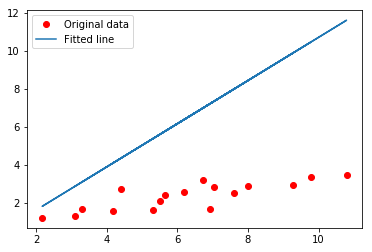

In [96]:
# compute
# Start training

with tf.Session() as sess:
    sess.run(init)
    # Fit all training data
    t_start = time.time()
    values = {}
    for epoch in range(training_epochs):
        for (X, Y) in zip(train_X, train_Y):
            values[x] = X
            values[y] = Y
            #compute the gradients
            cost_np = sess.run([cost], feed_dict=values)
            #update the parameters
            #values[w] -= learning_rate * grad_w_np
            #values[b] -= learning_rate * grad_b_np

        #Display logs per epoch step
        #print (epoch+1) % display_step
        #print values
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict=values)
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(w), "b=", sess.run(b)

    print "Optimization Finished, spend time: {}!".format(time.time()-t_start)
    values[x] = train_X
    values[y] = train_Y
  
    training_cost = sess.run(cost, feed_dict=values)
    print "Training cost=", training_cost, "w=", sess.run(w,feed_dict=values), "b=", sess.run(b,feed_dict=values), '\n'

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(w,feed_dict=values) * train_X + sess.run(b,feed_dict=values), label='Fitted line')
    plt.legend()
    plt.show()

In [116]:
tf.reset_default_graph()
# define the input by placeholder
with tf.name_scope('inputs'):
    x = tf.placeholder(tf.float32,name='x')
    y = tf.placeholder(tf.float32,name='y')
# define the weight
# represent the learnable paramters by tf.placeholder
with tf.variable_scope('params'):
    w = tf.Variable(rng.randn(),name='w')
    b = tf.Variable(rng.randn(),name='b')
# construct inference model
with tf.name_scope('inference'):
    y_pred = tf.multiply(w,x) + b
# Mean squared error as loss function
with tf.name_scope('loss'):
    cost = tf.reduce_sum(tf.pow(y_pred-y, 2))/(2*n_samples)
with tf.name_scope('grads'):
    grad_w,grad_b = tf.gradients(cost,[w,b])
with tf.name_scope('update_params'):
    new_w = w.assign(w,w-learning_rate*grad_w)
    new_b = b.assign(b,b-learning_rate*grad_b)
    print new_w,new_b
    updates = tf.group(new_w,new_b)
    print updates
init = tf.global_variables_initializer()
tf.summary.FileWriter('linear_model_v2',tf.get_default_graph())

Tensor("update_params/Assign:0", shape=(), dtype=float32_ref) Tensor("update_params/Assign_1:0", shape=(), dtype=float32_ref)
name: "update_params/group_deps"
op: "NoOp"
input: "^update_params/Assign"
input: "^update_params/Assign_1"



0.0016058
Epoch: 0050 cost= 0.001605799 W= 0.373892 b= -0.0927243
0.00121676
Epoch: 0100 cost= 0.001216758 W= 0.366499 b= -0.0395425
0.000900023
Epoch: 0150 cost= 0.000900023 W= 0.359546 b= 0.0104763
0.00064562
Epoch: 0200 cost= 0.000645620 W= 0.353007 b= 0.0575203
0.000444823
Epoch: 0250 cost= 0.000444823 W= 0.346856 b= 0.101766
0.000289999
Epoch: 0300 cost= 0.000289999 W= 0.341072 b= 0.143381
0.000174491
Epoch: 0350 cost= 0.000174491 W= 0.335631 b= 0.18252
9.24828e-05
Epoch: 0400 cost= 0.000092483 W= 0.330514 b= 0.219332
3.89099e-05
Epoch: 0450 cost= 0.000038910 W= 0.325701 b= 0.253954
9.36166e-06
Epoch: 0500 cost= 0.000009362 W= 0.321175 b= 0.286518
4.99794e-09
Epoch: 0550 cost= 0.000000005 W= 0.316917 b= 0.317144
7.51083e-06
Epoch: 0600 cost= 0.000007511 W= 0.312913 b= 0.345949
2.89944e-05
Epoch: 0650 cost= 0.000028994 W= 0.309147 b= 0.373041
6.19608e-05
Epoch: 0700 cost= 0.000061961 W= 0.305605 b= 0.398522
0.000104252
Epoch: 0750 cost= 0.000104252 W= 0.302274 b= 0.422486
0.0001540

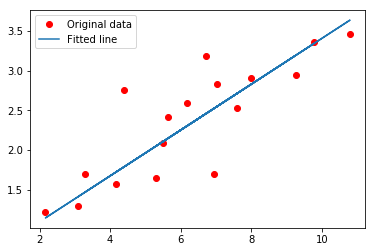

In [119]:
# compute
# Start training

with tf.Session() as sess:
    sess.run(init)
    # Fit all training data
    t_start = time.time()
    values = {}
    for epoch in range(training_epochs):
        for (X, Y) in zip(train_X, train_Y):
            values[x] = X
            values[y] = Y
            #compute the gradients
            cost_np,_ = sess.run([cost,updates], feed_dict=values)
            #print(w_np,b_np)
            #print cost_np
            #update the parameters
            #values[w] -= learning_rate * grad_w_np
            #values[b] -= learning_rate * grad_b_np

        #Display logs per epoch step
        #print (epoch+1) % display_step
        #print values
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict=values)
            print(c)
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(w), "b=", sess.run(b)

    print "Optimization Finished, spend time: {}!".format(time.time()-t_start)
    values[x] = train_X
    values[y] = train_Y
  
    training_cost = sess.run(cost, feed_dict=values)
    print "Training cost=", training_cost, "w=", sess.run(w,feed_dict=values), "b=", sess.run(b,feed_dict=values), '\n'

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(w,feed_dict=values) * train_X + sess.run(b,feed_dict=values), label='Fitted line')
    plt.legend()
    plt.show()

In [69]:
tf.reset_default_graph()
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [70]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [71]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [72]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.293763399 W= 0.509838 b= -1.07071
Epoch: 0100 cost= 0.268723488 W= 0.49436 b= -0.959364
Epoch: 0150 cost= 0.246574596 W= 0.479802 b= -0.854638
Epoch: 0200 cost= 0.226983175 W= 0.466111 b= -0.756141
Epoch: 0250 cost= 0.209654212 W= 0.453233 b= -0.663503
Epoch: 0300 cost= 0.194326237 W= 0.441122 b= -0.576374
Epoch: 0350 cost= 0.180768371 W= 0.429731 b= -0.494428
Epoch: 0400 cost= 0.168776065 W= 0.419017 b= -0.417355
Epoch: 0450 cost= 0.158168808 W= 0.408941 b= -0.344866
Epoch: 0500 cost= 0.148786604 W= 0.399464 b= -0.276688
Epoch: 0550 cost= 0.140487984 W= 0.39055 b= -0.212565
Epoch: 0600 cost= 0.133147866 W= 0.382167 b= -0.152256
Epoch: 0650 cost= 0.126655579 W= 0.374282 b= -0.0955337
Epoch: 0700 cost= 0.120913252 W= 0.366866 b= -0.0421848
Epoch: 0750 cost= 0.115834273 W= 0.359891 b= 0.00799119
Epoch: 0800 cost= 0.111342035 W= 0.353332 b= 0.055183
Epoch: 0850 cost= 0.107368819 W= 0.347162 b= 0.0995681
Epoch: 0900 cost= 0.103854656 W= 0.341359 b= 0.141313
Epoch: 0950 

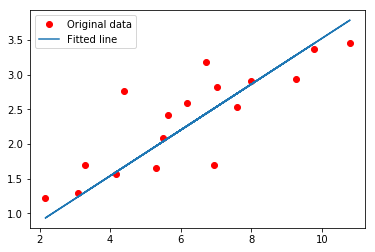

In [74]:
# Start training
with tf.Session() as sess:
    t_start = time.time()
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished, spend time: {}!".format(time.time()-t_start)
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [9]:
# Regression result